In [1]:
import pandas as pd
import sqlite3
import itertools
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
turkey = pd.read_pickle("data/turkey_credits.pickle")
china = pd.read_pickle("data/china_credits.pickle")
brazil = pd.read_pickle("data/brazil_credits.pickle")
usa = pd.read_pickle("data/usa_credits_all.pickle")

In [3]:
possible_total = pd.read_pickle("data/possible_credits_2009.pickle")
possible_total.rename(columns={0: 'possible_points'}, inplace=True)

In [4]:
def get_credits(country):
    credits = country.iloc[:,19:67].transpose()
    return(credits)

In [5]:
def row_sum(country):
    credits = country.iloc[:,19:67].transpose()
    my_list = []
    for row in credits.iloc[:, :30].iterrows():
        index, total = row
        my_list.append(total.tolist())
    my_totals = []
    for i in my_list:
        my_totals.append(np.sum(i))
    return(my_totals)

In [6]:
def row_mean(country):
    credits = country.iloc[:,19:67].transpose()
    my_list = []
    for row in credits.iloc[:, :30].iterrows():
        index, total = row
        my_list.append(total.tolist())
    my_totals = []
    for i in my_list:
        my_totals.append(np.mean(i))
    return(my_totals)

In [7]:
def row_median(country):
    credits = country.iloc[:,19:67].transpose()
    my_list = []
    for row in credits.iloc[:, :30].iterrows():
        index, total = row
        my_list.append(total.tolist())
    my_totals = []
    for i in my_list:
        my_totals.append(np.median(i))
    return(my_totals)

In [8]:
def sum_mean_median(country):
    totals = row_sum(country)
    mean = row_mean(country)
    median = row_median(country)
    credits = get_credits(country)
    credits['totals'] = totals 
    credits['mean'] = mean
    credits['median'] = median
    return(credits)

In [9]:
def percent_achieved(credits):
    credits = credits.join(possible_total)
    percent_achieved = [(m / p)*100 for m,p in zip(credits['mean'].tolist(), credits['possible_points'].tolist())]
    rounded_percent = [float(format(i, '.2f')) for i in percent_achieved]
    credits['percent_achieved'] = rounded_percent
    return(credits)

In [10]:
def percent_frequency(credits):
    percent_list = []
    for row in credits.iloc[:, :30].iterrows():
        index, total = row
        row_count = 0  
        for i in total:
            if i > 0:
                row_count += 1
        row_total = len(total)
        percent_list.append(float((row_count/row_total)))
    return(percent_list)

In [11]:
def complete_data(country):
    credits = sum_mean_median(country)
    credits = percent_achieved(credits)
    credits['percent_frequency'] = percent_frequency(credits)
    return(credits)

In [12]:
turkey_credits = complete_data(turkey)
china_credits = complete_data(china)
usa_credits = complete_data(usa)
brazil_credits = complete_data(brazil)

In [13]:
percent_list = [turkey_credits.percent_achieved.tolist(), 
                china_credits.percent_achieved.tolist(), 
                usa_credits.percent_achieved.tolist(), 
                brazil_credits.percent_achieved.tolist()]

In [14]:
def my_t_test(a_list):
    percent_list = list(itertools.combinations(a_list, 2))
    for i in percent_list:
        t, p = ttest_ind(i[0], i[1], equal_var=False)
        print(t,p)

In [15]:
my_t_test(percent_list)

0.0153506380298 0.987785262353
0.556715673887 0.579065329475
1.15942973581 0.24922411371
0.510802997573 0.610742271799
1.0912989669 0.277936847141
0.68410301696 0.495642017244


By country the points earned by credit are not statisically different

In [16]:
frequency_list = [turkey_credits['percent_frequency'].tolist(), 
            china_credits['percent_frequency'].tolist(), 
            usa_credits['percent_frequency'].tolist(), 
            brazil_credits['percent_frequency'].tolist()]

In [17]:
my_t_test(frequency_list)

-0.142103585545 0.887304743431
0.739323456561 0.461574757264
0.151001003081 0.880298758881
0.851026944528 0.397000447328
0.28782756408 0.774121077159
-0.591572602686 0.555566189933


By Country the frequncy of meeting certain credits is not different. 

In [18]:
one = [[1, 3, 5], [2, 4, 6]]
two = [[7, 9, 11], [8, 10, 12]]
three = list(zip(one, two))
three[0][0]

[1, 3, 5]

#### T Test for Individual Credits

In [19]:
turkey_credits.iloc[[0, 1, 21], :-6]

,55568,55980,56020,58487,60401,60677,62045,63739,66772,67513,...,76492,76654,77431,77803,78615,78751,79378,81863,82069,94271
EAc1,0,1,1,0,1,0,0,1,0,0,...,0,1,1,1,1,1,1,1,1,1
EAc2,0,1,1,0,0,2,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
IDc1,4,1,5,4,4,5,4,3,2,3,...,5,4,4,5,4,3,2,4,4,4


In [20]:
def credit_t_test(df1, df2):
    first_list_total = []
    first_list_index = []
    for row in df1.iloc[[0, 1, 21], :-6].iterrows():
        index1, total1 = row
        first_list_total.append(total1.tolist())
        first_list_index.append(index1)
    second_list_total = []
    second_list_index = []
    for row in df2.iloc[[0, 1, 21], :-6].iterrows():
        index2, total2 = row
        second_list_total.append(total2.tolist())
        second_list_index.append(index2)
    t_test_list = list(zip(first_list_total, second_list_total))
    count = 0
    for i in t_test_list:
        a = [float(j) for j in i[0]]
        b = [float(k) for k in i[1]]
        t, p = ttest_ind(a, b, equal_var=False)
        if p < 0.05:
            print("{}: t {}, p {}".format(first_list_index[count], t,p))
        count += 1

The only credits worth looking at are the EAc1, EAc2 and IDc1

In [21]:
list_2009 = ['BR', 'CN', 'TR', 'US']
country_list = list(itertools.combinations(list_2009, 2))
country_list

[('BR', 'CN'),
 ('BR', 'TR'),
 ('BR', 'US'),
 ('CN', 'TR'),
 ('CN', 'US'),
 ('TR', 'US')]

In [22]:
credit_t_test(brazil_credits, china_credits)

IDc1: t 3.0956712584310764, p 0.0029993595184039123


Brazil statistaically is more likley (p=0.003) to meet Innovation and design credit 1 compared to china

In [23]:
credit_t_test(brazil_credits, turkey_credits)

In [24]:
credit_t_test(brazil_credits, usa_credits)

EAc1: t -6.85255472773124, p 7.589062860528424e-08
IDc1: t 5.858214180265654, p 1.3887849660477289e-06


Brazil is statistically less likely compared to the USA to meet EAc1 and IDc1

In [25]:
credit_t_test(china_credits, turkey_credits)

EAc2: t 2.8126004002188094, p 0.006846959297280327


China is statisically more likely (p=0.007) to meet EAc2 compared to Turkey

In [26]:
credit_t_test(china_credits, usa_credits)

EAc1: t -11.753365595180709, p 1.3053533246248377e-22
EAc2: t 3.067690041182334, p 0.0037295742835399223
IDc1: t 2.0284895050327143, p 0.046909834484615866


China does not do well on EAc1 compared to the USA. They do however do much better than the USA on EAc2. They are also slightly better on IDc1.

In [27]:
credit_t_test(turkey_credits, usa_credits)

EAc1: t -18.045264541587972, p 6.070549165247458e-58
IDc1: t 3.493203144528725, p 0.0012803276186032521


Turkey does really poorly on EAc1 but does better than the USA on IDc1. 

In [28]:
turkey_credits.iloc[[23, 25, 26, 27, 28, 45, 47], :-6]

,55568,55980,56020,58487,60401,60677,62045,63739,66772,67513,...,76492,76654,77431,77803,78615,78751,79378,81863,82069,94271
MRc1.1,0,3,0,0,3,0,0,0,0,3,...,0,2,0,0,0,0,0,0,0,0
MRc2,1,1,2,1,0,2,1,2,2,0,...,2,0,1,0,2,2,0,2,2,0
MRc3,0,0,2,0,0,2,0,2,0,0,...,1,0,0,0,0,0,0,0,0,0
MRc4,2,0,2,1,0,2,1,2,1,0,...,2,0,1,2,2,2,2,2,2,2
MRc5,2,2,2,2,1,2,2,2,1,2,...,2,2,2,2,2,2,2,2,2,2
WEc1,4,1,1,1,2,1,1,1,1,1,...,2,2,4,2,4,4,2,2,4,0
WEc3,1,1,1,1,0,0,1,1,1,1,...,4,4,4,4,4,4,3,4,4,0


### Mann Whitney U Test with Credits (ordinal data)

In [29]:
def credit_mann_u(df1, df2):
    first_list_total = []
    first_list_index = []
    for row in df1.iloc[[23, 25, 26, 27, 28, 45, 47], :-6].iterrows():
        index1, total1 = row
        first_list_total.append(total1.tolist())
        first_list_index.append(index1)
    second_list_total = []
    second_list_index = []
    for row in df2.iloc[[23, 25, 26, 27, 28, 45, 47], :-6].iterrows():
        index2, total2 = row
        second_list_total.append(total2.tolist())
        second_list_index.append(index2)
    t_test_list = list(zip(first_list_total, second_list_total))
    count = 0
    for i in t_test_list:
        try:
            a = [float(j) for j in i[0]]
            b = [float(k) for k in i[1]]
            mann = mannwhitneyu(a, b)
            if mann[1] < 0.05:
                print("{}: {}".format(first_list_index[count], mann))
        except Exception:
            pass
        count += 1

Credits to consider - WEc1, WEc3, MRc1.1, MRc2, MRc3, MRc4, MRc5, 

In [30]:
credit_mann_u(brazil_credits, china_credits)

MRc3: MannwhitneyuResult(statistic=473.0, pvalue=0.01107312103065373)
MRc4: MannwhitneyuResult(statistic=394.5, pvalue=0.024848901490810371)
WEc3: MannwhitneyuResult(statistic=340.0, pvalue=0.00074423288965303348)


Brazil is statiscially different to china on MRc3, MRc4, WEc3. 

In [31]:
credit_mann_u(brazil_credits, turkey_credits)

MRc4: MannwhitneyuResult(statistic=245.0, pvalue=0.0086083655275030584)
WEc1: MannwhitneyuResult(statistic=287.0, pvalue=0.042446521581592032)
WEc3: MannwhitneyuResult(statistic=270.5, pvalue=0.015506023455711946)


Brazil is statisically different to turkey on MRc4 and WEc1 and WEc3

In [32]:
credit_mann_u(brazil_credits, usa_credits)

MRc2: MannwhitneyuResult(statistic=6097.5, pvalue=0.048861519401053898)
MRc3: MannwhitneyuResult(statistic=6808.5, pvalue=0.03064718120955922)
MRc4: MannwhitneyuResult(statistic=5453.0, pvalue=0.0070134447585492952)
MRc5: MannwhitneyuResult(statistic=6001.0, pvalue=0.035015444900773275)
WEc1: MannwhitneyuResult(statistic=3706.0, pvalue=4.4711467848901822e-06)
WEc3: MannwhitneyuResult(statistic=5314.5, pvalue=0.0072487468100006997)


In [33]:
credit_mann_u(china_credits, turkey_credits)

MRc2: MannwhitneyuResult(statistic=464.0, pvalue=0.0041866298572602904)
MRc3: MannwhitneyuResult(statistic=559.0, pvalue=0.0075287572312117542)


In [34]:
credit_mann_u(china_credits, usa_credits)

MRc2: MannwhitneyuResult(statistic=9155.5, pvalue=0.00028292665062429936)
MRc5: MannwhitneyuResult(statistic=9254.5, pvalue=0.0003179930895000959)
WEc1: MannwhitneyuResult(statistic=6979.0, pvalue=1.104474636969341e-07)


In [35]:
credit_mann_u(turkey_credits, usa_credits)

MRc3: MannwhitneyuResult(statistic=8033.0, pvalue=0.0079161140867656399)
MRc5: MannwhitneyuResult(statistic=6395.0, pvalue=0.0016215020698953581)
WEc1: MannwhitneyuResult(statistic=6211.5, pvalue=0.0017825368446797961)


In [36]:
turkey_credits.iloc[[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 
                     29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46], :-6]

,55568,55980,56020,58487,60401,60677,62045,63739,66772,67513,...,76492,76654,77431,77803,78615,78751,79378,81863,82069,94271
EAc3,2,0,1,0,0,1,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
EAc4,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
EAc5,3,0,1,1,0,1,1,0,1,1,...,1,3,3,3,3,3,3,3,3,0
EAc6,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EQc1,0,0,1,1,0,1,0,0,0,1,...,0,0,0,1,1,1,1,1,1,0
EQc2,1,1,1,1,0,1,0,1,1,1,...,1,1,1,1,1,0,1,1,1,1
EQc3.1,1,0,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,1
EQc3.2,1,0,1,1,0,1,0,0,1,1,...,1,0,1,1,1,1,1,1,1,0
EQc4.1,1,1,1,1,1,1,0,1,0,1,...,1,1,1,1,1,0,0,0,0,0
EQc4.2,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,0,1,1,1


### Chi Square Test (binary data)

In [37]:
def credit_chi(df1, df2):
    first_list_total = []
    first_list_index = []
    for row in df1.iloc[[2, 3, 4, 5, 6, 7, 8, 9, 10, 
                         11, 12, 13, 14, 15, 16, 17, 
                         18, 19, 20, 22, 24, 29, 30, 
                         31, 32, 33, 34, 35, 36, 37, 
                         38, 39, 40, 41, 42, 43, 44, 
                         46], :-6].iterrows():
        index1, total1 = row
        first_list_total.append(total1.tolist())
        first_list_index.append(index1)
    second_list_total = []
    second_list_index = []
    for row in df2.iloc[[2, 3, 4, 5, 6, 7, 8, 9, 10, 
                         11, 12, 13, 14, 15, 16, 17, 
                         18, 19, 20, 22, 24, 29, 30, 
                         31, 32, 33, 34, 35, 36, 37, 
                         38, 39, 40, 41, 42, 43, 44, 
                         46], :-6].iterrows():
        index2, total2 = row
        second_list_total.append(total2.tolist())
        second_list_index.append(index2)
    first_total_count = []
    for i in first_list_total:
        count_yes = 0
        count_no = 0
        for a in i:
            if int(a) > 0:
                count_yes +=1
            else: count_no +=1
        first_total_count.append((count_yes, count_no))
    second_total_count = []
    for i in second_list_total:
        count_yes = 0
        count_no = 0
        for a in i:
            if int(a) > 0:
                count_yes +=1
            else: count_no +=1
        second_total_count.append((count_yes, count_no))  
    chi_list = list(zip(first_total_count, second_total_count))
    count = 0
    counter = 0
    for i in chi_list:
        try: 
            chi2, p, ddof, expected = chi2_contingency(i)
            if p < 0.01:
                msg = "Test Statistic: {}\np-value: {}"
                print("{}".format(first_list_index[counter]))
                print(msg.format( chi2, p))
        except:
            pass
        counter +=1

In [38]:
credit_chi(brazil_credits, china_credits)

EAc6
Test Statistic: 7.274795127353265
p-value: 0.006992886843753955
EQc1
Test Statistic: 9.832687622455065
p-value: 0.001714376671604285
EQc2
Test Statistic: 11.417417281149557
p-value: 0.000727587689077776
EQc3.2
Test Statistic: 26.0285817400296
p-value: 3.364001134902113e-07
EQc7.1
Test Statistic: 10.82945419145484
p-value: 0.0009989808188233832
EQc7.2
Test Statistic: 12.905112871624501
p-value: 0.00032768577260394944


In [39]:
credit_chi(brazil_credits, turkey_credits)

EAc4
Test Statistic: 12.699862637362635
p-value: 0.00036568243678656475
EQc2
Test Statistic: 7.803277777777779
p-value: 0.005215154696519386
EQc3.2
Test Statistic: 8.556225633528266
p-value: 0.003443425938109135
EQc5
Test Statistic: 11.846888354700857
p-value: 0.000577577757869295
EQc6.1
Test Statistic: 8.723734318996414
p-value: 0.0031409403924595723
EQc7.1
Test Statistic: 13.017321428571424
p-value: 0.0003086229428224596
MRc7
Test Statistic: 14.552482578397214
p-value: 0.00013630893082228548


In [40]:
credit_chi(brazil_credits, usa_credits)

EQc4.3
Test Statistic: 48.777252867080286
p-value: 2.867462801639523e-12
EQc4.4
Test Statistic: 25.131600903280027
p-value: 5.354812119286899e-07
EQc5
Test Statistic: 8.08555947940214
p-value: 0.004461935414114691
EQc6.1
Test Statistic: 23.019226644233143
p-value: 1.6038931793197784e-06
EQc7.1
Test Statistic: 17.820422004714857
p-value: 2.4276362627429996e-05
SSc4.1
Test Statistic: 13.894012878211147
p-value: 0.0001934136042273233
SSc5.2
Test Statistic: 11.122689644090523
p-value: 0.0008527803347130125
SSc7.1
Test Statistic: 10.5551654915964
p-value: 0.0011586383870284545
WEc2
Test Statistic: 133.61189515844873
p-value: 6.643108946941762e-31


In [41]:
credit_chi(china_credits, turkey_credits)

EAc5
Test Statistic: 7.339174613584796
p-value: 0.00674678107156543
EQc6.2
Test Statistic: 9.521992724058208
p-value: 0.00203024005994654


In [42]:
credit_chi(china_credits, usa_credits)

EAc3
Test Statistic: 10.5988116052391
p-value: 0.0011316037075125697
EAc4
Test Statistic: 14.43607717697474
p-value: 0.0001449977873002621
EAc6
Test Statistic: 27.32581149402373
p-value: 1.719013662680265e-07
EQc1
Test Statistic: 9.558029730831645
p-value: 0.00199076666154216
EQc2
Test Statistic: 29.043734791928085
p-value: 7.076258169104238e-08
EQc3.2
Test Statistic: 46.79475996670304
p-value: 7.88238896884248e-12
EQc4.3
Test Statistic: 43.7957182680556
p-value: 3.645015920486808e-11
EQc4.4
Test Statistic: 46.00619453262521
p-value: 1.178796698740004e-11
EQc6.2
Test Statistic: 9.06572888511956
p-value: 0.0026044469663259744
EQc7.2
Test Statistic: 10.394227579315134
p-value: 0.0012640986848924706
EQc8.1
Test Statistic: 19.501843009523164
p-value: 1.0050266756556902e-05
SSc3
Test Statistic: 9.921637029392711
p-value: 0.0016334703195101223
SSc4.1
Test Statistic: 26.650762146128457
p-value: 2.437546205299427e-07
SSc4.2
Test Statistic: 9.765294658806566
p-value: 0.0017783701077291963
SSc4.

In [43]:
credit_chi(turkey_credits, usa_credits)

EAc4
Test Statistic: 33.56979596638992
p-value: 6.8752077332854744e-09
EAc5
Test Statistic: 11.91957487309645
p-value: 0.0005554715563453505
EAc6
Test Statistic: 19.24233903848877
p-value: 1.1513145040058881e-05
EQc2
Test Statistic: 17.13130376095985
p-value: 3.488261162175123e-05
EQc3.2
Test Statistic: 7.878217782036674
p-value: 0.005003376416805841
EQc4.1
Test Statistic: 17.36801967576455
p-value: 3.0796443911129035e-05
EQc4.3
Test Statistic: 46.73403843801603
p-value: 8.130446397441546e-12
EQc4.4
Test Statistic: 35.14329338693899
p-value: 3.06314518668403e-09
EQc8.1
Test Statistic: 10.741257077313549
p-value: 0.001047731378922466
MRc6
Test Statistic: 7.873552014702084
p-value: 0.005016302201463108
MRc7
Test Statistic: 7.600666325143267
p-value: 0.00583467338840666
SSc4.1
Test Statistic: 20.643137610476575
p-value: 5.533516439891415e-06
SSc4.2
Test Statistic: 8.989917381018666
p-value: 0.0027147327389648096
SSc4.4
Test Statistic: 7.167464260686402
p-value: 0.007423763817124279
SSc7.2

## Plotting Percent Achieved for Each Country

In [44]:
percent_achieved_df = turkey_credits['percent_achieved'].to_frame()
percent_achieved_df.rename(columns={'percent_achieved': 'Turkey'}, inplace=True)
percent_achieved_df = percent_achieved_df.join(china_credits['percent_achieved'].to_frame())
percent_achieved_df.rename(columns={'percent_achieved': 'China'}, inplace=True)
percent_achieved_df = percent_achieved_df.join(usa_credits['percent_achieved'].to_frame())
percent_achieved_df.rename(columns={'percent_achieved': 'USA'}, inplace=True)
percent_achieved_df = percent_achieved_df.join(brazil_credits['percent_achieved'].to_frame())
percent_achieved_df.rename(columns={'percent_achieved': 'Brazil'}, inplace=True)

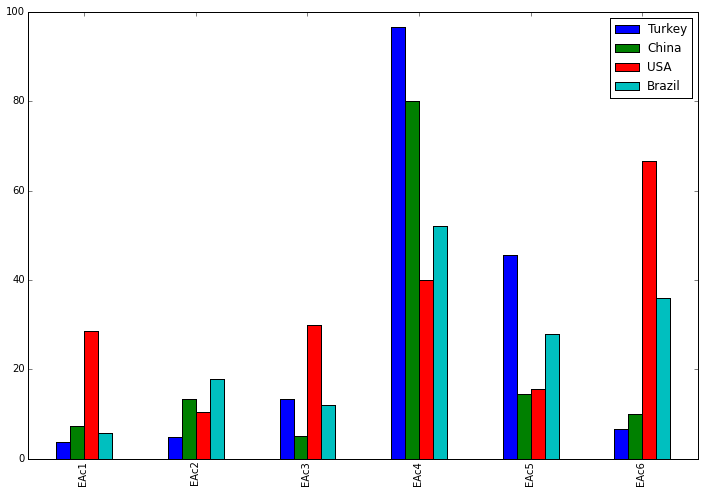

In [48]:
percent_achieved_df.iloc[:6,:].plot(kind='bar', figsize=(12,8));

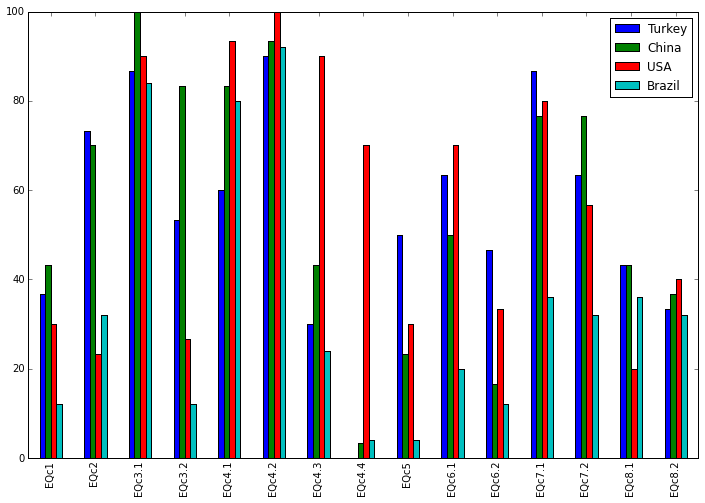

In [316]:
percent_achieved_df.iloc[6:21,:].plot(kind='bar', figsize=(12,8));

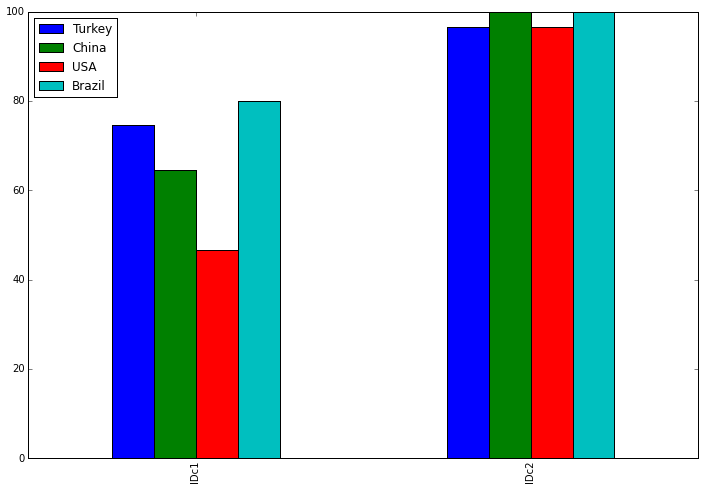

In [317]:
percent_achieved_df.iloc[21:23,:].plot(kind='bar', figsize=(12,8))

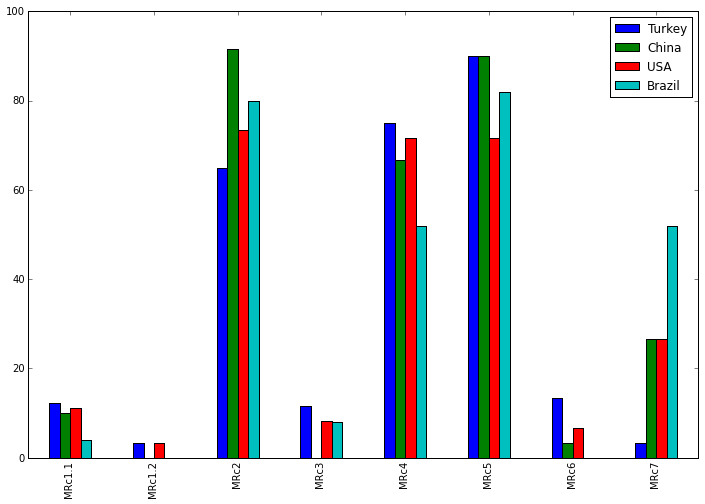

In [318]:
percent_achieved_df.iloc[23:31,:].plot(kind='bar', figsize=(12,8));

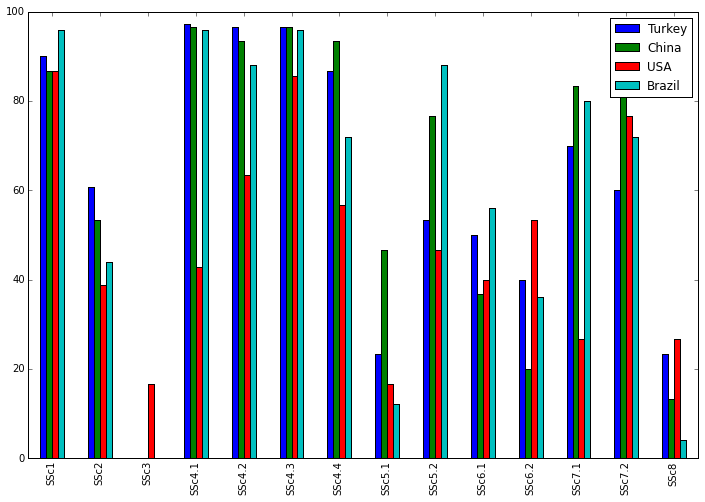

In [319]:
percent_achieved_df.iloc[31:45,:].plot(kind='bar', figsize=(12,8));

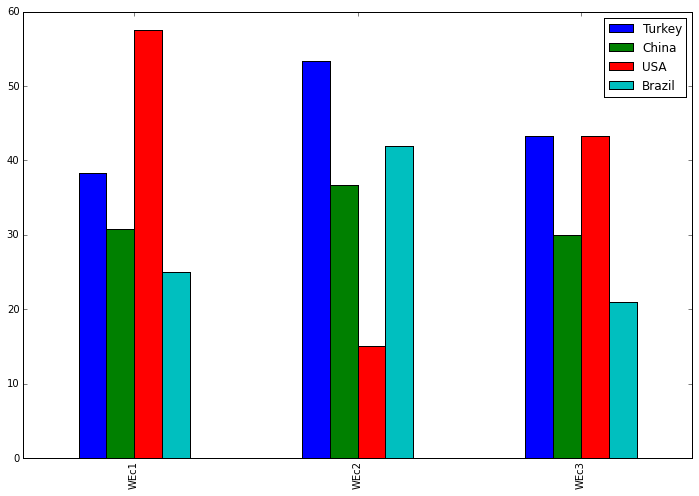

In [320]:
percent_achieved_df.iloc[45:48,:].plot(kind='bar', figsize=(12,8), dpi=500);

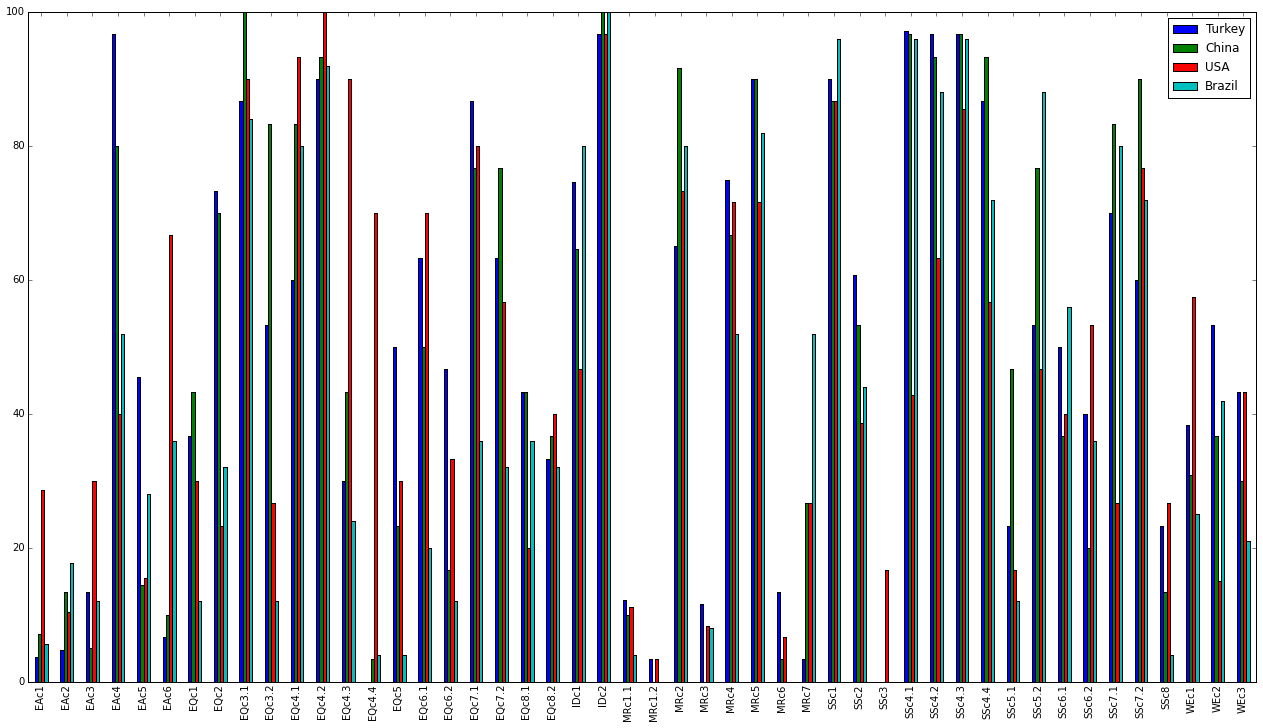

In [321]:
percent_achieved_df.plot(kind='bar', figsize=(22,12));

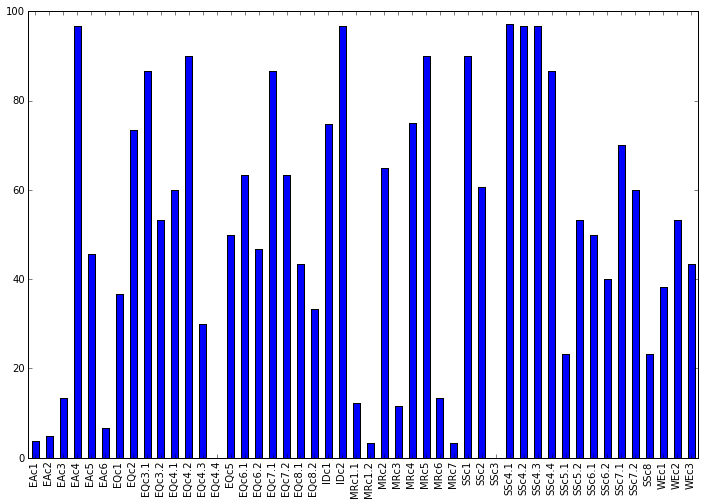

In [42]:
turkey_credits['percent_achieved'].plot(kind='bar', figsize=(12,8))

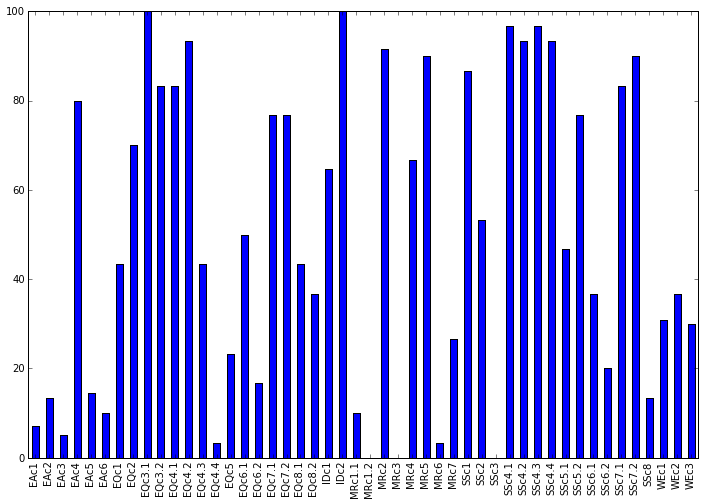

In [44]:
china_credits['percent_achieved'].plot(kind='bar', figsize=(12,8))

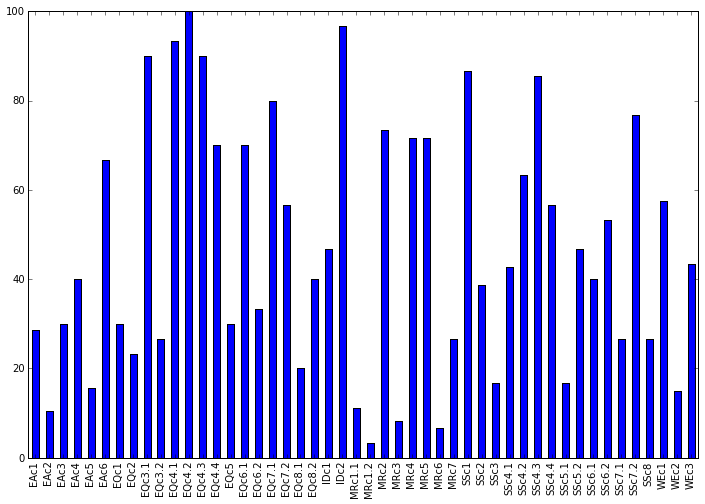

In [45]:
usa_credits['percent_achieved'].plot(kind='bar', figsize=(12,8))

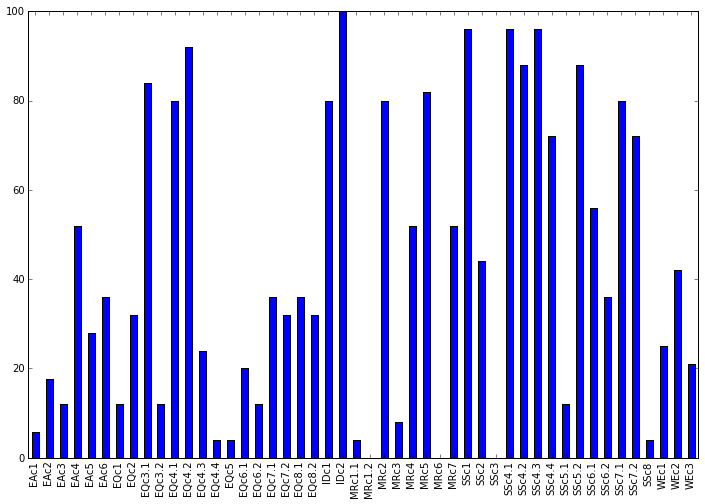

In [46]:
brazil_credits['percent_achieved'].plot(kind='bar', figsize=(12,8))